# Image Processing in Python without OpenCV

## Image Importing and Acquisition

* * *
We will be using only ```NumPy``` and ```Matplotlib``` libraries for this week's project.

In [254]:
import numpy as np
import matplotlib.image as img
from matplotlib import pyplot as plt

Images are in essence arrays of numbers. Gray-scaled images are 2D arrays where as RGB images are 3D arrays of depth 3 for each different colour.

In [255]:
image1 = img.imread("park.jpg")

The image loaded in is the one below.<br>
<img src = "park.jpg"></img>

Some of the attributes of the image saved in the variable **image1** are as given below

In [256]:
type(image1), image1.size, image1.shape, image1.ndim

(numpy.ndarray, 819840, (427, 640, 3), 3)

Thus, the image is stored as an array of 427 rows and 640 columns and has a depth of 3 each of which stores the image corresponding to the red blue and green colour.


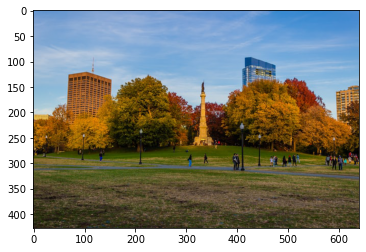

In [257]:
plt.imshow(image1)
plt.show()

We can also flip this image vertically as well as horizontally using inverse slicing.


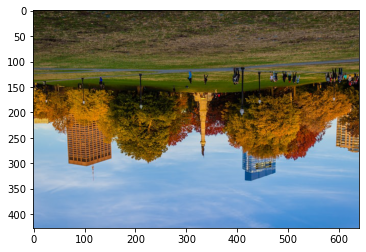

Vertical Flip


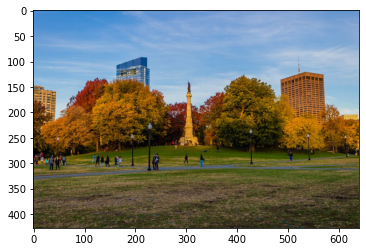

Horizontal Flip


In [258]:
img_vertical = image1[::-1,:,:]
img_horizontal = image1[:,::-1,:]
plt.imshow(img_vertical)
plt.show()
print("Vertical Flip")
plt.imshow(img_horizontal)
plt.show()
print("Horizontal Flip")

Since the images here are stored as arrays we can slice them and output any segement of the array

In [259]:
print(image1[3,100:200,0])

[120 120 120 120 122 122 122 122 122 122 122 122 125 125 125 126 126 126
 127 129 129 129 129 129 130 131 131 131 129 129 129 129 129 129 129 129
 128 128 128 128 128 128 128 128 127 127 127 127 127 127 127 127 128 128
 128 128 129 129 130 130 129 129 129 128 128 127 127 127 127 127 127 127
 127 128 128 128 125 125 125 125 125 125 127 127 129 129 129 129 128 128
 128 128 127 127 127 128 128 129 129 129]


The above is the 4th row from columns 100 to 199 of the red part of the **image1**.

* * *
## Image Analysing and Manipulating
* * *
### Image Colour Flip



When we invert an image, the intensity at each point is changed to its opposite value. Here as all the values are represented from [0, 255]. A pixel having x intensity will now have (255 - x) intensity value.

In [260]:
image_invert = 255 - image1[:,:,:]

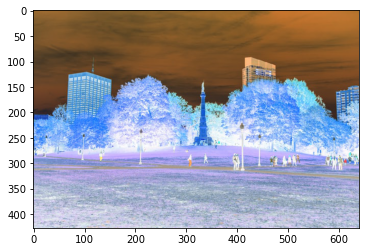

In [261]:
plt.imshow(image_invert)
plt.show()

### Colour conversion from RGB to grayscale

Taking the average of the RGB image across all three colours gives us the grayscale image of the RGB image.

In [262]:
arr_img = np.uint8(image1[:,:,0]/3 + image1[:,:,1]/3 + image1[:,:,2]/3)

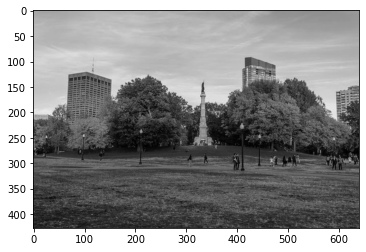

In [263]:
plt.imshow(arr_img, cmap="gray")
plt.show()

Another way to Grayscale an RGB image is to use weigthed average. The coefficients below have been tried and are known to fit the best and produce better grascale conversion. 

In [264]:
rgb_weights = [0.2989, 0.5870, 0.1140]
image_grayscale1 = np.dot(image1[:,:,:3], rgb_weights)

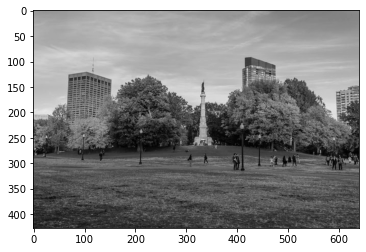

In [265]:
plt.imshow(image_grayscale1, cmap = "gray")
plt.show()

### Image Cropping 

Image cropping can be easily done through array slicing the image array to weild desired cropped images.

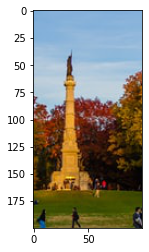

In [266]:
cropped1 = image1[100:300, 300:400,:]
plt.imshow(cropped1)
plt.show()

The above image is cropped to show the monument. It can be cropped to depict the building behind as is done below.

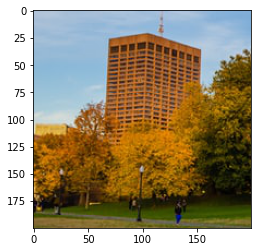

In [267]:
cropped2 = image1[100:300,:200,:]
plt.imshow(cropped2)
plt.show()

### Scaling
*Down Scaling Through Pixel Binning*

In Pixel binning a window of preferred size is chosen which moves all over the image edge to edge and averages the image out to its centre. We use the grayscaled version of the image for simplicity.

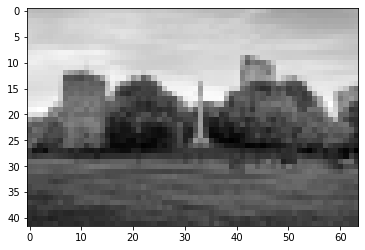

In [268]:
n = 10                                                      # ratio to downscale image to
length = arr_img.shape[0]                                   # length of the original image
breadth = arr_img.shape[1]                                  # breadth of the original image
downscaled = np.zeros((int(length/n), int(breadth/n)))      # an array with the new length and breadth acc. to the ratio 
temp = np.zeros(n*n)                                        # temporary array to create moving window, chosen as 1D so we can 
                                                            # use np.mean easily

for i in range (int(length/n)):                             #for each row
    for j in range (int(breadth/n)):                        # in each row each column element
        temp[:] = 0                                         # making temp array zero again to reuse
        for k in range(n):                                  #loops to go through the window array of length n breadth n
            for l in range(n):
                temp[n*k + l] = arr_img[n*i + k, n*j + l]   # capturing the old array into the window
        downscaled[i, j] = np.uint8(np.mean(temp))          # averaging the window to one pixel

plt.imshow(downscaled, cmap = "gray")
plt.show()

Grayscale downscaled by a ratio of 10 of the image.

* * *
## Advanced Concepts
* * *
### Scaling
*Upscaling through interpolation*

In the case of nearest neighbor interpolation, the color value of the non-integer pixel
location, in the original image, which is needed to be assigned to the integer pixel
location, in the upscaled image, is directly estimated as the color value of the
nearest integer pixel location within the original image.

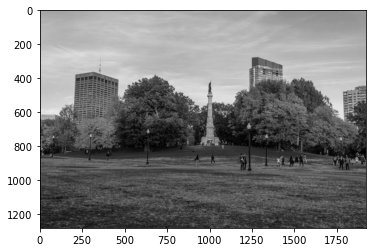

In [269]:
n = 3
upscaled = np.zeros((n*length, n*breadth))

for i in range(n*length):
    for j in range(n*breadth):
        upscaled[i, j] = arr_img[i//n, j//n]
plt.imshow(upscaled, cmap = "gray")
plt.show()

### Blurring

To blur an image we simply just average out each pixel so surronding pixels have somewhat close values which results in the blurrring effect we see.

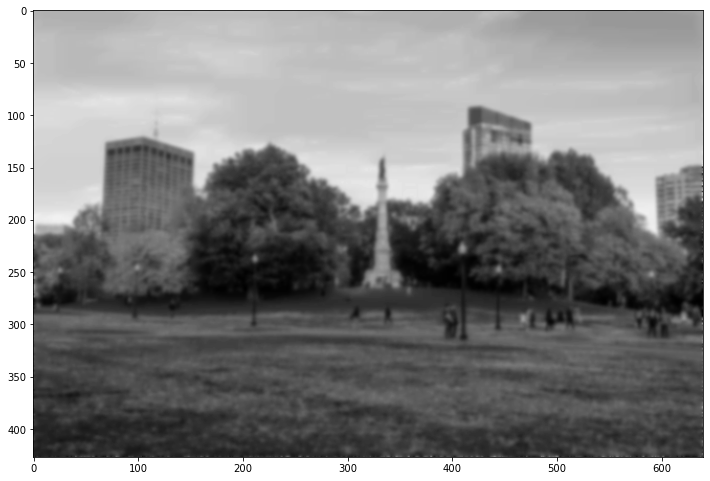

In [270]:
arr_img2 = np.uint8(image1[:,:,0]/3 + image1[:,:,1]/3 + image1[:,:,2]/3)                      #grayscale image for simplicity

def blur(I):                                                                                  #blur function which does weighted
    for i in range(1,I.shape[0]-1):                                                           # average of pixels around a pixel
        for j in range(1,I.shape[1]-1):
            I[i,j] = (4*I[i,j] + I[i-1,j] + I[i+1,j] + I[i,j-1] + I[i,j+1])/8.0
    return I


for i in range(10):                                                                           # multiple blurring so that the 
    blur(arr_img2)                                                                            # effect is visible.

plt.figure(figsize=(12,12))                                                                   # size of plot is increased 
plt.imshow(arr_img2 , cmap="gray")
plt.show()

### Creating Borders

To create a border we just need to add a padding around the array of the desired pixel length.

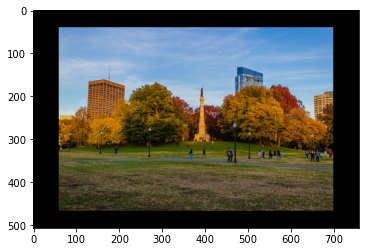

In [278]:
n = 40                                                                    # top border pixel length
m = 60                                                                    # right and left border pixel length
image2 = img.imread('park.jpg')
a = np.uint8(np.zeros((length + 2*n, breadth + 2*m, 3)))                  # initializing array to image with borders
a[n:length + n, m:breadth + m] = image2                                   # setting the middle part of the array to the image

plt.imshow(a)
plt.show()

### Thresholding

Thresholding is converting an image which is grayscaled to such an image which is binary, i.e., an image which contains the maximum and the minimum value only. A limit is chosen as the thresholding limit which depicts the extent of the process.

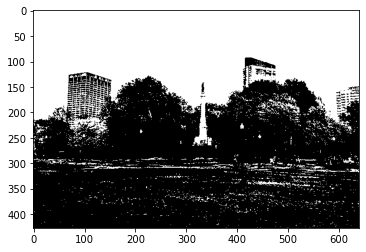

In [284]:
threshold = 100                                      # thresholding limit
binary = np.where(arr_img > threshold, 255, 0)       # np.where function which replaces elements of an array if they pass a
                                                     # criterion for it or else is replaced by another value.
plt.imshow(binary, cmap = "gray")
plt.show()